In [5]:
import warnings
warnings.filterwarnings("ignore")
from evaluation.mol_structure import list_of_smiles_to_nx_graphs
from evaluation.mol_structure import draw_one_mol, draw_graphs
from evaluation.new_structural_metric import symmetric_graph_set_distance,atom,cycle,neighborhood
from evaluate import evaluate
#import utils.graph_generators as gen
import torch
import networkx as nx
import os 
import sys
import json
current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)
import rdkit
import numpy as np
from evaluation.utils import get_data,get_graph_data,  get_mock_data,remove_empty_graphs_and_targets,\
    get_generated_data,preprocess,get_generated_graph_data,_preprocess



In [9]:
import pandas as pd
def get_rewired_graph_data(name,percent):
    generated_neg_graphs=pd.read_pickle(f'data/rewired/{name}_train1_neg/{name}_train1_neg_rewired_with_{percent}.pkl')
    generated_pos_graphs=pd.read_pickle(f'data/rewired/{name}_train1_pos/{name}_train1_pos_rewired_with_{percent}.pkl')
    generated_graphs,generated_targets = generated_pos_graphs + generated_neg_graphs, [1]*len(generated_pos_graphs)+[0]*len(generated_neg_graphs)
    return  generated_graphs, np.array(generated_targets)

In [12]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn','structural', 'auc_roc']
generators=['swingnn','gdss']
splits=['_50']
rewiring_ratio=['5','10','25','33','40','50','66','75','90','100']
metrics={}
for generator in ['rewired']:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
            for percent in rewiring_ratio:
                print(dataset_name+split)
                train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
                generated_graphs, generated_targets= get_rewired_graph_data(dataset_name+split,percent)
                
                splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
                metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
                metrics['dataset']=dataset_name+split
                metrics['generator_name']=generator
                metrics['degree_of_perturbation']=percent
                print(metrics)

synthetic_1_50
Now computing classifier based metrics
{'activations_time': 0.12489128112792969, 'fid': 0.8565697315438214, 'fid_time': 0.1268930435180664, 'kid': 0.026730895, 'kid_time': 0.14792466163635254, 'precision': 0.9425, 'recall': 0.9825, 'f1_pr': 0.962094419902131, 'precision_time': 0.1878347396850586, 'recall_time': 0.1878347396850586, 'f1_pr_time': 0.1878347396850586, 'density': 0.9935, 'coverage': 0.97, 'f1_dc': 0.9816193724535527, 'density_time': 0.18436336517333984, 'coverage_time': 0.18436336517333984, 'f1_dc_time': 0.18436336517333984, 'mmd_rbf': 0.006902933120727539, 'mmd_rbf_time': 0.2096855640411377, 'mmd_linear': 0.6247199, 'mmd_linear_time': 0.12489128112792969, 'dataset': 'synthetic_1_50', 'generator_name': 'rewired', 'degree_of_perturbation': '5'}
synthetic_1_50


KeyboardInterrupt: 

In [7]:
metrics_type=['nn' ]
if  'nn' in metrics_type: 
    print('hi')
     

hi


In [ ]:
import pandas as pd
def get_corrupted_graph_data(name,percent):
    generated_neg_graphs=pd.read_pickle(f'data/corrupted/{name}_train1_neg/{name}_train1_neg_perturbed_with_{percent}.pkl')
    generated_pos_graphs=pd.read_pickle(f'data/corrupted/{name}_train1_pos/{name}_train1_pos_perturbed_with_{percent}.pkl')
    generated_graphs,generated_targets = generated_pos_graphs + generated_neg_graphs, [1]*len(generated_pos_graphs)+[0]*len(generated_neg_graphs)
    return  generated_graphs, np.array(generated_targets)

In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['swingnn','gdss']
splits=['_50']
rewiring_ratio=[i for i in range(1, 29)]
metrics={}
for generator in ['corrupted']:
    for dataset_name in ['synthetic_1']:
        for split in splits:
            for percent in rewiring_ratio:
                print(dataset_name+split)
                train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
                generated_graphs, generated_targets= get_corrupted_graph_data(dataset_name+split,percent)
                splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
                metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
                metrics['dataset']=dataset_name+split
                metrics['generator_name']=generator
                metrics['degree_of_perturbation']=percent
                print(metrics)

In [ ]:


import pandas as pd
def get_mode_dropping_graph_data(name,percent):
    #try:
    generated_neg_graphs=pd.read_pickle(f'data/mode_dropping/{name}_train1_neg/{name}_train1_neg_no_of_clusters_dropped_{percent}.pkl')
    #except:generated_neg_graphs=[]
    try:
        generated_pos_graphs=pd.read_pickle(f'data/mode_dropping/{name}_train1_pos/{name}_train1_pos_no_of_clusters_dropped_{percent}.pkl')
    except:generated_pos_graphs=[]
    generated_graphs,generated_targets = generated_pos_graphs + generated_neg_graphs, [1]*len(generated_pos_graphs)+[0]*len(generated_neg_graphs)
    return  generated_graphs, np.array(generated_targets)

In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['swingnn','gdss']
splits=['_50']
rewiring_ratio=[i for i in range(1, 29)]
metrics={}
for generator in ['mode_dropping']:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
            for percent in rewiring_ratio:
                print(dataset_name+split)
                train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
                generated_graphs, generated_targets= get_mode_dropping_graph_data(dataset_name+split,percent)
                splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
                metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
                metrics['dataset']=dataset_name+split
                metrics['generator_name']=generator
                metrics['degree_of_perturbation']=percent
                print(metrics)



In [ ]:
import pandas as pd
def get_mode_collapse_graph_data(name,percent):
    #try:
    generated_neg_graphs=pd.read_pickle(f'data/mode_collapse/{name}_train1_neg/{name}_train1_neg_no_of_clusters_collapsed_{percent}.pkl')
    #except:generated_neg_graphs=[]
    try:
        generated_pos_graphs=pd.read_pickle(f'data/mode_collapse/{name}_train1_pos/{name}_train1_pos_no_of_clusters_collapsed_{percent}.pkl')
    except:generated_pos_graphs=[]
    generated_graphs,generated_targets = generated_pos_graphs + generated_neg_graphs, [1]*len(generated_pos_graphs)+[0]*len(generated_neg_graphs)
    return  generated_graphs, np.array(generated_targets)

In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['swingnn','gdss']
splits=['_50']
rewiring_ratio=[i for i in range(1, 27)]
metrics={}
for generator in ['mode_collapse']:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
            for percent in rewiring_ratio:
                print(dataset_name+split)
                train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
                generated_graphs, generated_targets= get_mode_collapse_graph_data(dataset_name+split,percent)
                splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
                metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
                metrics['dataset']=dataset_name+split
                metrics['generator_name']=generator
                metrics['degree_of_perturbation']=percent
                print(metrics)

In [ ]:
[i for i in range(1, 29)]

In [ ]:
def get_generated_graph_data(name, path=r'data/graphs/datasets',generator_name='swingnn'):
    dataset=name[:name.rindex('_')]
    if generator_name=='swingnn': 
        generated_neg_graphs=pd.read_pickle(path + f'/{dataset}/{name}/{name}_gen_neg_{generator_name}.pkl')
        generated_pos_graphs=pd.read_pickle(path + f'/{dataset}/{name}/{name}_gen_pos_{generator_name}.pkl')
    else:
        generated_neg_graphs=pd.read_pickle(path + f'/{dataset}/{name}/{name}_gen_neg_{generator_name}.p')
        generated_pos_graphs=pd.read_pickle(path + f'/{dataset}/{name}/{name}_gen_pos_{generator_name}.p')
    generated_graphs,generated_targets = generated_pos_graphs + generated_neg_graphs, [1]*len(generated_pos_graphs)+[0]*len(generated_neg_graphs)
    return  generated_graphs, np.array(generated_targets)

In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['swingnn','gdss']
splits=['_25','_33','_40','_50']
metrics={}
for generator in generators:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets= get_generated_graph_data(dataset_name+split,generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['swingnn','gdss']
splits=['_25','_33','_40','_50']
metrics={}
for generator in ['train']:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets= train1_graphs,train1_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['gdss','swingnn']
splits=['_25','_33','_40','_50']
metrics={}
for generator in generators:
    for dataset_name in ['synthetic_2']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets= get_generated_graph_data(dataset_name+split,generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


In [ ]:
train1_neg_graphs=pd.read_pickle('data/graphs/datasets/synthetic_1/synthetic_1_25/synthetic_1_25_train1_neg.p')


In [ ]:
train1_neg_graphs

In [ ]:
data/graphs/datasets/synthetic_1/synthetic_1_25/synthetic_1_25_train1_neg.p

In [ ]:
train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')


In [ ]:
train1_graphs=_preprocess(train1_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name='')
train2_graphs=_preprocess(train2_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name='')
test_graphs=_preprocess(test_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name='')
generated_graphs=_preprocess(generated_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name='')


In [ ]:

def auc_estimate(pos_graphs,neg_graphs,test_pos_graphs, test_neg_graphs):
    train_graphs=pos_graphs+neg_graphs
    train_targets=np.array([1]*len(pos_graphs) + [0]*len(neg_graphs))
    test_graphs=test_pos_graphs+test_neg_graphs
    test_targets=np.array([1]*len(test_pos_graphs) + [0]*len(test_neg_graphs))
    #print(test_targets)
    #random.shuffle(test_targets)
    #print(test_targets)
    #transform
    vectorizer = Vectorizer(r=2,d=4)
    train_data_mtx = vectorizer.transform(train_graphs)
    test_data_mtx = vectorizer.transform(test_graphs)
    estimator = ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=0).fit(train_data_mtx, train_targets)
    preds = estimator.predict_proba(test_data_mtx)[:,1]
    auc1 = roc_auc_score(test_targets, preds)
    return auc1

In [ ]:
vectorizer = Vectorizer(r=2,d=4)
train_data_mtx = vectorizer.transform(_preprocess(train1_graphs+generated_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name=''))
test_data_mtx = vectorizer.transform(_preprocess(test_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name=''))
estimator = ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=0).fit(train_data_mtx, list(train1_targets)+list(generated_targets))
preds = estimator.predict_proba(test_data_mtx)[:,1]
auc1 = roc_auc_score(test_targets, preds)
auc1



In [ ]:
    train1_graphs[0].edges(data=True)

In [ ]:
train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')

In [ ]:

train1_graphs[0].nodes(data=True)

In [ ]:
metrics

In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral','common_substructures']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['swingnn']
splits=['_25','_33','_40','_50']
metrics={}
for generator in generators:
    for dataset_name in ['synthetic_path_vs_tree']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets= get_generated_graph_data(dataset_name+split,generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

train1_graphs

In [ ]:
def draw_graphs(graphs, node_color='label', edge_color='label', n_graphs_per_line=13, size=3):
    unique_node_labels = list(sorted(set(str(graph.nodes[u].get(node_color,0)) for graph in graphs for u in graph.nodes())))
    node_labels_color_map = {unique_node_label: i/len(unique_node_labels) for i,unique_node_label in enumerate(unique_node_labels)}
    unique_edge_labels = list(sorted(set(str(graph.edges[u,v].get(edge_color,0)) for graph in graphs for u,v in graph.edges())))
    edge_labels_color_map = {unique_edge_label: i/len(unique_edge_labels) for i,unique_edge_label in enumerate(unique_edge_labels)}
    n = len(graphs)
    n_lines = np.ceil(n / n_graphs_per_line).astype(int)
    fig, axs = plt.subplots(n_lines, n_graphs_per_line, figsize=(size*n_graphs_per_line,size*n_lines))
    for t,graph in enumerate(graphs):
        col = t % n_graphs_per_line
        row = t // n_graphs_per_line
        #if n_lines>1: ax = axs[row,col]
        ax = axs[col]
        ax.axis('off')
        pos = nx.kamada_kawai_layout(graph)
        node_colors = [node_labels_color_map[str(graph.nodes[u].get(node_color,0))] for u in graph.nodes()]
        nx.draw_networkx_nodes(graph, pos, node_size=80, node_color=node_colors, cmap='Set3', linewidths=1, edgecolors='k', ax=ax)
        edge_colors = [edge_labels_color_map[str(graph.edges[u,v].get(edge_color,0))] for u,v in graph.edges()]
        nx.draw_networkx_edges(graph, pos, width=1, style='-', edge_color=edge_colors, edge_cmap=plt.get_cmap('tab20'), ax=ax)    
    plt.show()

In [ ]:
nx.draw(generated_graphs[0])

In [ ]:
import matplotlib.pyplot as plt
print('sample of positive graphs')
draw_graphs(list(train1_graphs[:13]))   
print('sample of negative graphs')
draw_graphs(list(train1_graphs[len(train1_graphs)-13:]),n_graphs_per_line=13)   
import matplotlib.pyplot as plt
print('sample of generated positive graphs')
draw_graphs(list(generated_graphs[:13]))   
print('sample of generated negative graphs')
draw_graphs(list(generated_graphs[len(generated_graphs)-13:]),n_graphs_per_line=13)   


In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral','common_substructures']
device=torch.device('cpu')
metrics_type=['nn','molecular' 'structural', 'auc_roc']
generators=['swingnn']
splits=['_25','_33','_40','_50']
metrics={}
for generator in generators:
    for dataset_name in ['synthetic_path_vs_tree']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets= get_generated_graph_data(dataset_name+split,generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


In [ ]:
import  pandas as pd

x=pd.DataFrame(metrics, index=[i for i in range(1)])

In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
generators=['swingnn']
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=get_generated_data(dataset_name+split, generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


In [ ]:
import  rdkit
rdkit.Chem.Draw.MolsToGridImage(molsPerRow=3)

# Data collection

## Hide

In [ ]:
#disable  
from rdkit import RDLogger 
RDLogger.EnableLog('rdApp.*')
#RDLogger.DisableLog('rdApp.*')        
name='ames'                                                                                                                                                                                                                                                                                                                                                                                                                                                               
path='data/smiles/{}/train1_smiles.txt'.format(name)
#rom data.smiles.carcinogens import test_smiles
reference_smiles_list = []
with open(path) as my_file:
    for line in my_file:
        reference_smiles_list.append(line)
reference_nx_graphs=list_of_smiles_to_nx_graphs(reference_smiles_list)
"""
print(reference_smiles_list[0])
mol = Chem.MolFromSmiles(reference_smiles_list[0])
Chem.Kekulize(mol)
Chem.RemoveStereochemistry(mol)
Chem.rdmolops.AddHs(mol)
print(mol_to_smiles([mol])[0])
print(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0])
rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(reference_smiles_list[0]))
rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]))

#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )

#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )
"""

In [ ]:
list_of_G=reference_nx_graphs[:4]
#for n , d in (G.nodes().items() ):
    #print(str(d['label'][0]))

draw_graphs(list_of_G)

In [ ]:
draw_one_mol(reference_nx_graphs[2])
print(reference_smiles_list[2])
draw_one_mol(reference_nx_graphs[2])

rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(reference_smiles_list[2]))


In [ ]:
reference_nx_graphs[0].nodes(data=True)

In [ ]:
reference_nx_graphs[0].edges(data=True)

## Show


In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['nspdk','WL']
metrics_type=['nn', 'structural','molecular', 'auc_roc']
#leave it blank to compute all the structural structures 
generators=['hiervae','wgan','stgg','moflow','gdss','jtnn']

In [ ]:
device=torch.device('cpu')
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=get_generated_data(dataset_name+split, generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)
            break
        break
    brea


In [ ]:
device=torch.device('cpu')
metrics={}
for generator in ['train1']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=train1_graphs,train1_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

In [ ]:
device=torch.device('cpu')
metrics={}
for generator in ['train2']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=train2_graphs,train2_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

In [ ]:
device=torch.device('cpu')
metrics={}
for generator in ['train1/2+train2/2']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            half=len(train1_graphs)//2
            half2=len(train2_graphs)//2
            train3_graphs,train3_targets=train1_graphs[:half]+train2_graphs[:half], train1_targets[:half]+train2_targets[:half]
            generated_graphs, generated_targets=train3_graphs,train3_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

In [ ]:
device=torch.device('cpu')
metrics={}
for generator in ['jtnn']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=get_generated_data(dataset_name+split, generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


## Dev

## Vectorize


In [ ]:
from eden.ml.ml import serial_vectorize as vectorize
from eden.graph import Vectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

estimator =ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=0)
generator='stgg'
dataset_name='cyp1a2_veith'
metrics_type=['auc_roc']
train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name, return_smiles=False)
generated_graphs, generated_targets=get_generated_data(dataset_name,generator_name=generator)
train_graphs, train_targets=train1_graphs +  train2_graphs , list(train1_targets)+list(train2_targets)
train1_plus_generated_targets=list(train1_targets)+list(generated_targets)   
   
vectorizer = Vectorizer(
            r=2, d=4,
            normalization=False,
            inner_normalization=False,
            discrete=True,
            nbits=10)

def serialize(train_graphs,test_graphs,train1_graphs,generated_graphs):
        X_train=vectorize(train_graphs,vectorizer=vectorizer).toarray()
        X_test=vectorize(test_graphs,vectorizer=vectorizer).toarray()
        X_train1=vectorize(train1_graphs,vectorizer=vectorizer).toarray()
        X_generated=vectorize(generated_graphs,vectorizer=vectorizer).toarray()
        X_train1_plus_generated=np.vstack((X_train1,X_generated))
        return X_train,X_test,X_train1,X_generated,X_train1_plus_generated
X_train,X_test,X_train1,X_generated,X_train1_plus_generated=serialize(train_graphs,test_graphs,train1_graphs,generated_graphs)

def predict(test_embedding):
        preds= estimator.predict_proba(test_embedding)[:,1]
        return preds
def compute_auc(X_train, train_targets,X_test, test_targets):
    estimator.fit( X_train,train_targets)
    preds=predict(X_test )
    auc=roc_auc_score(test_targets, preds)
    return auc

auc_1= compute_auc(X_train1, train1_targets, X_test, test_targets)
auc_2=compute_auc(X_train, train_targets, X_test, test_targets)
auc_3=compute_auc(X_generated, generated_targets, X_test, test_targets)
auc_4=compute_auc( X_train1_plus_generated,train1_plus_generated_targets, X_test, test_targets)
print(auc_1, auc_2,auc_3,auc_4 )


In [ ]:
metrics={}

metrics_type=['auc_roc']
for generator in ['stgg','gdss','hiervae','moflow','wgan']:
    for dataset_name in ['cyp1a2_veith']:
        train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name, return_smiles=False)
        generated_graphs, generated_targets=get_generated_data(dataset_name,generator_name=generator)
        splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
        metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
        metrics['dataset']=dataset_name
        metrics['generator_name']=generator
        print(metrics)

# New metric  (Step 1 and Step 2)

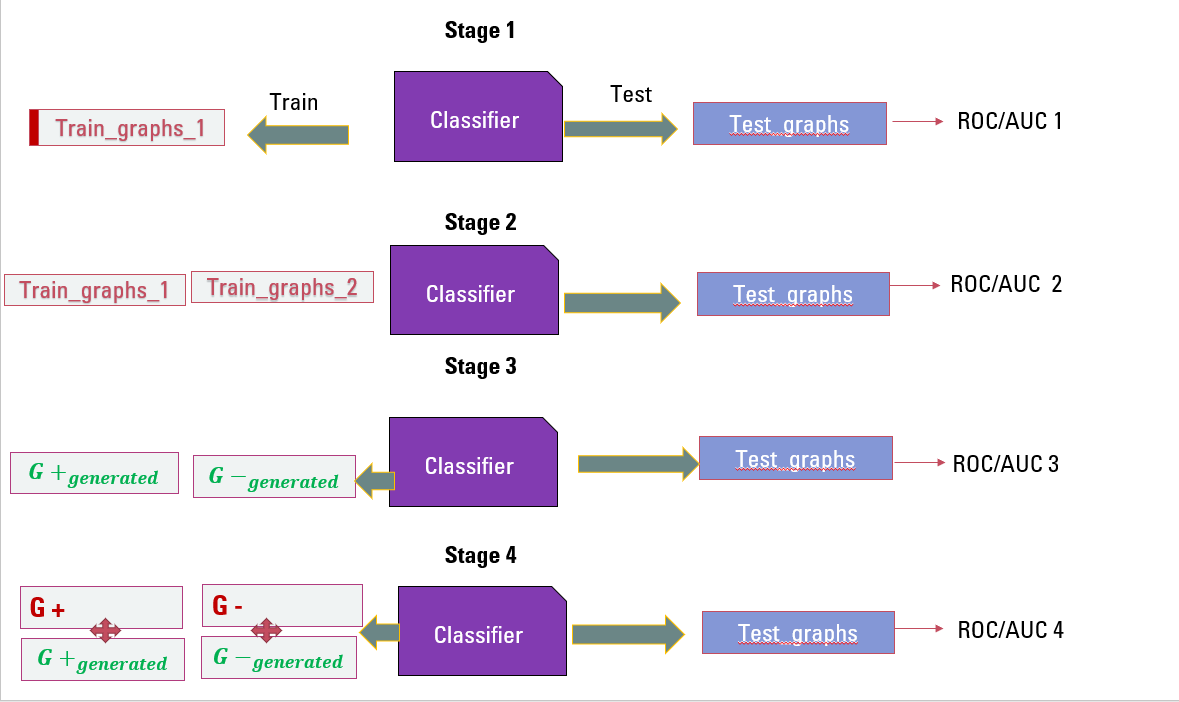

# NN classifier  with ogb AtomEncoder, BondEncoder

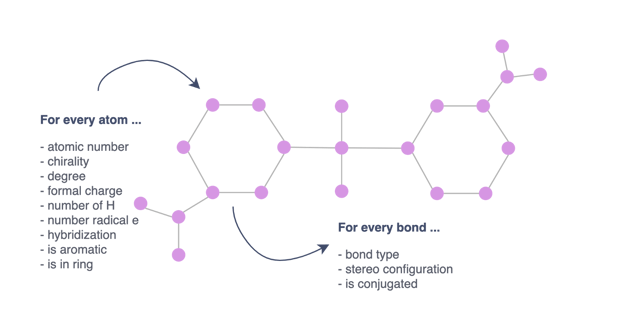